<a href="https://colab.research.google.com/github/BRUNAAM/MINERA-O-DE-DADOS/blob/main/C%C3%B3pia_de_Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISE EXPLORATORIA DE DADOS, COMPARAÇÃO DE MODELOS RASOS E ESEMBLE, COM METRICAS E EXPOSIÇÃO DE QUAL FOI A MELHOR**

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, roc_curve, auc)

In [342]:
data = pd.read_csv('/content/drive/MyDrive/sentimentdataset.csv')

In [343]:
print(data.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [344]:
data.size

10980

In [345]:
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

Valores ausentes por coluna:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [346]:
def categorizar_sentimento(sentimento):
    if sentimento.strip() in ['Positive', 'Joy', 'Excitement', 'Contentment']:
        return '+'
    elif sentimento.strip() in ['Negative', 'Frustration', 'Anger', 'Discontent']:
        return '-'
    else:
        return '0'

data['Sentimento_Agrupado'] = data['Sentiment'].apply(categorizar_sentimento)


In [347]:
distribuicao_sentimentos = data['Sentimento_Agrupado'].value_counts()

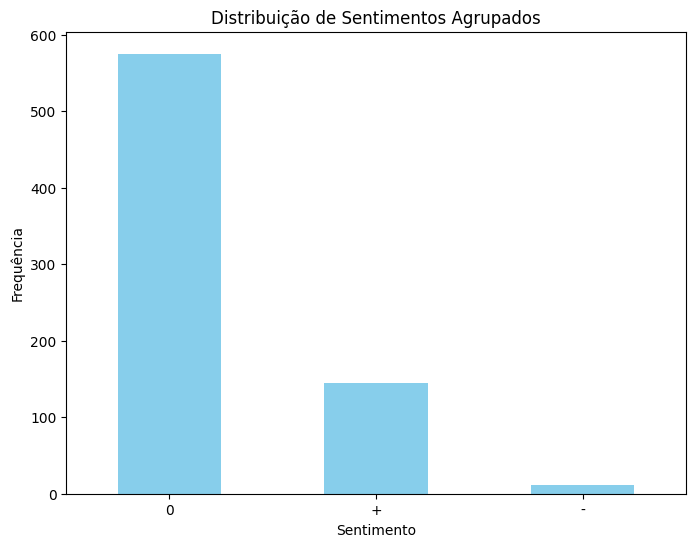

In [348]:
plt.figure(figsize=(8, 6))
distribuicao_sentimentos.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Sentimentos Agrupados')
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

In [349]:
data_filtrada = data[data['Sentimento_Agrupado'].isin(['+', '-', '0'])]

In [350]:
X = data_filtrada['Text']
y = data_filtrada['Sentimento_Agrupado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **Extração de características com TF-IDF**

In [351]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

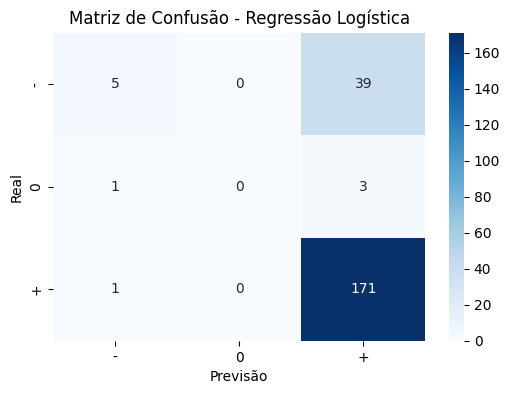

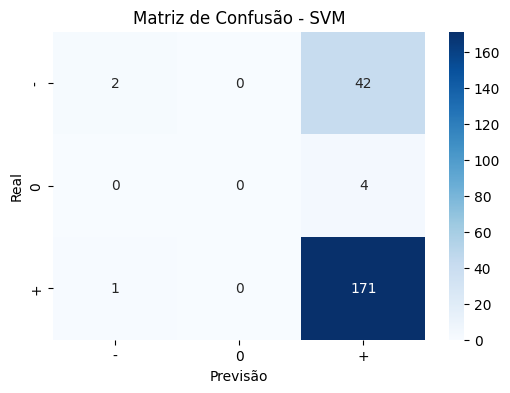

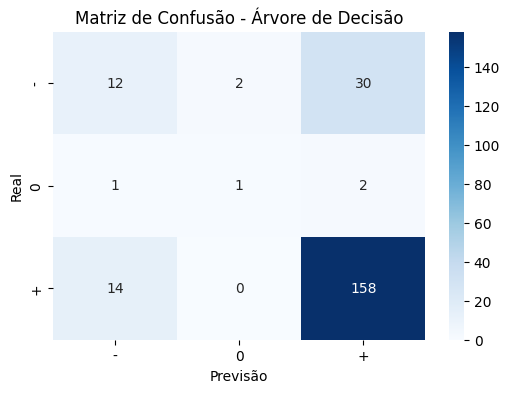

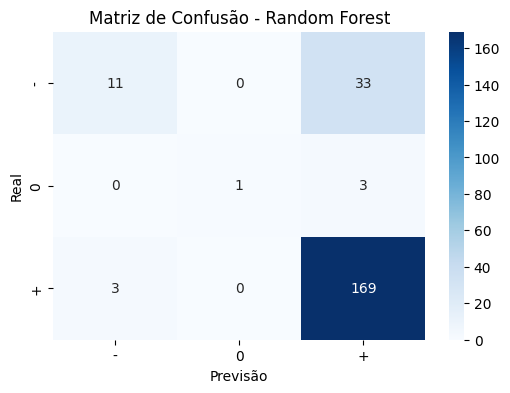

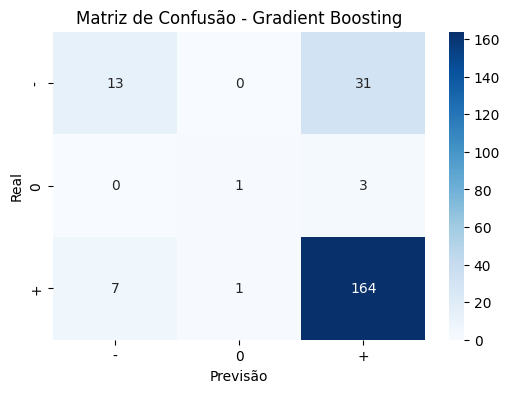

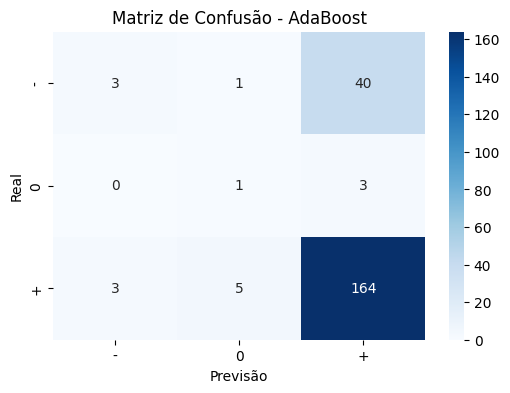

In [352]:
 #Gerar as matrizes de confusão e exibi-las
for nome, modelo in modelos.items():
    # Gerar previsões para os dados de teste
    previsoes = modelo.predict(X_test_tfidf)

    # Calcular a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, previsoes)

    # Criar um gráfico de heatmap da matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.show()


***Modelos para Dados Rasos:***
**Regressão Logística (Logistic Regression)**
**SVM (Support Vector Machine)**
**Árvore de Decisão (Decision Tree)**

***Modelos de Ensemble***:
**Random Forest**
**Gradient Boosting**
**AdaBoost**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

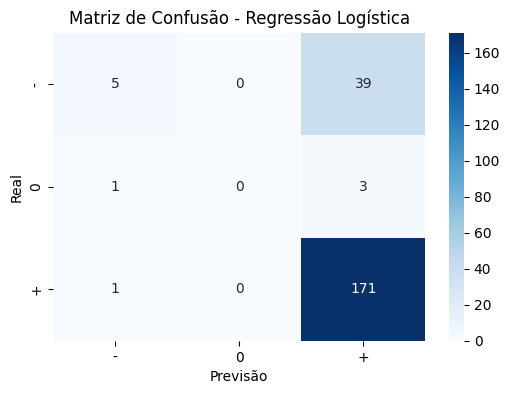

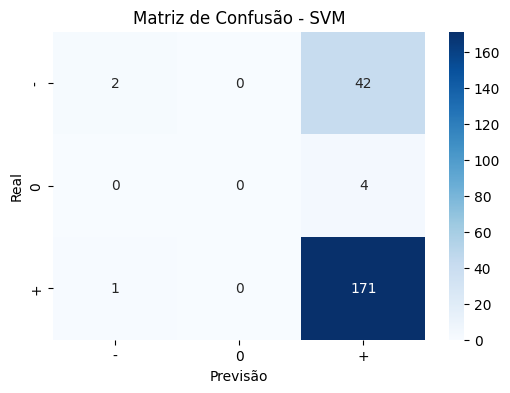

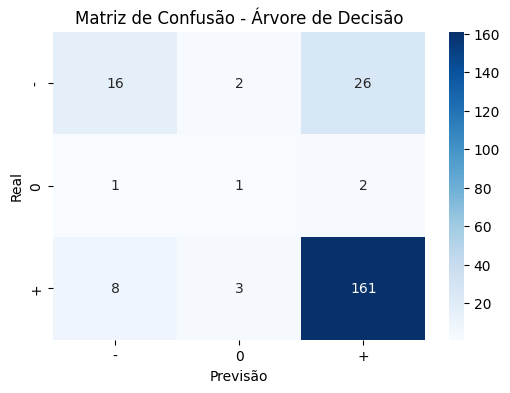

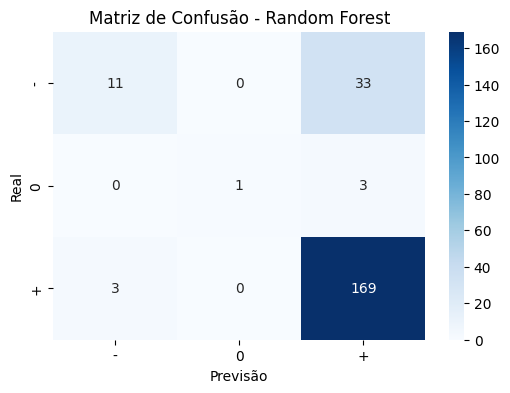

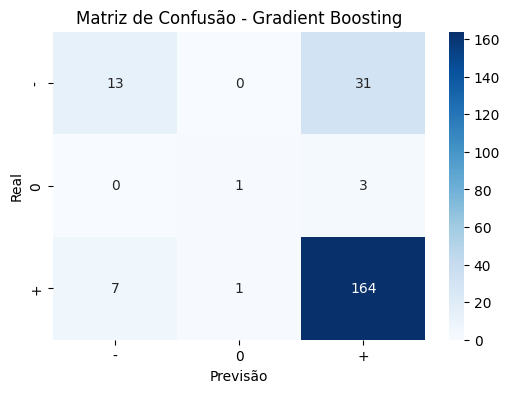

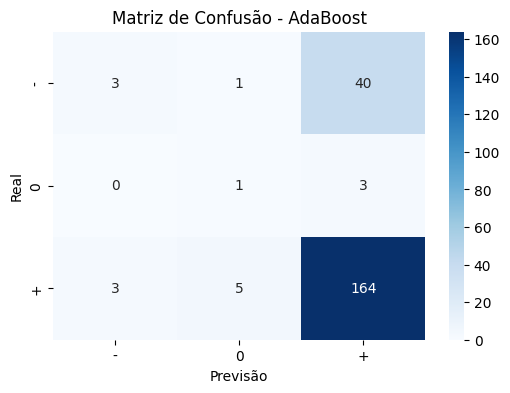

In [353]:
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=200),
    'SVM': SVC(probability=True),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
}

relatorios_modelos = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train_tfidf, y_train)
    previsoes = modelo.predict(X_test_tfidf)
    relatorio = classification_report(y_test, previsoes, output_dict=True)
    matriz_confusao = confusion_matrix(y_test, previsoes)
    kappa = cohen_kappa_score(y_test, previsoes)
    cross_val = np.mean(cross_val_score(modelo, X_train_tfidf, y_train, cv=5))

     #Gerar as matrizes de confusão e exibi-las
for nome, modelo in modelos.items():
    # Gerar previsões para os dados de teste
    previsoes = modelo.predict(X_test_tfidf)

    # Calcular a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, previsoes)

    # Criar um gráfico de heatmap da matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.show()


In [354]:
    if hasattr(modelo, "predict_proba"):
        probabilidades = modelo.predict_proba(X_test_tfidf)[:, 1]
        fpr, tpr, _ = roc_curve(y_test.map({'+': 1, '-': 0, '0': 0}), probabilidades, pos_label=1)
        auc_roc = auc(fpr, tpr)
    else:
        auc_roc = None

    relatorios_modelos[nome] = {
        'Acurácia': accuracy_score(y_test, previsoes),
        'F1-Score': relatorio['weighted avg']['f1-score'],
        'Precisão': relatorio['weighted avg']['precision'],
        'Recall': relatorio['weighted avg']['recall'],
        'Kappa': kappa,
        'Cross-Val Score': cross_val,
        'Matriz de Confusão': matriz_confusao,
        'AUC ROC': auc_roc
    }


In [355]:
# Passo 9: Exibir os resultados em uma tabela
relatorios_df = pd.DataFrame(relatorios_modelos).T
print(relatorios_df)


           AUC ROC  Acurácia Cross-Val Score  F1-Score     Kappa  \
AdaBoost  0.573735  0.763636        0.691776  0.703919  0.085093   

                            Matriz de Confusão  Precisão    Recall  
AdaBoost  [[3, 1, 40], [0, 1, 3], [3, 5, 164]]  0.722009  0.763636  
